# 🧮 The Coefficient of Drag

As described in the [previous page](rslookup.md), the resistance force $F$ on an immersed organism moving in a fluid is commonly expressed in a ratio known as the Coefficient of Drag:
$$
C_d  = \frac{F}{\frac{1}{2} \rho L^2 U^2}
$$
The Coefficient of Drag is the formula used to calculate the drag forces on an organism from an observation made on a dynamically similar scale model (that is, a model that is geometrically similar and has the same Reynolds number, $\mathcal{Re}$).

The power of this approach is illustrated by the plot below, which shows the drag force on *any* size spherical organism moving at *any* velocity in fluid of *any* viscosity and density.

In [1]:
# Import modules:
#%matplotlib
from math import *
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import root, bisect
import matplotlib.pyplot as plt
plt.ion()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Experimental data for Cd for a sphere:
relist=[ .05875, .1585, .4786, 3.020, 7.015, 15.49, 57.54, 144.5, 264.9, 512.9, 1000., 1862., 3162., 4764., 8375., .1556*10**5, .2648*10**5, .3467*10**5, .5888*10**5, .1000*10**6, .1702*10**6, .2317*10**6, .2648*10**6, .2710*10**6, .2851*10**6, .3020*10**6, .3388*10**6, .3981*10**6, .5129*10**6, .1778*10**7, .2291*10**7, .5012*10**7]
cdlist = [492.0, 169.8, 58.88, 10.86, 5.623, 3.388, 1.479, .9204, .7194, .5623, .4786, .4365, .4074, .3890, .3981, .4395, .4571, .4775, .4732, .4624,.4395, .4046, .3733, .3467, .2472, .1778, .1047, .09772, .1000, .1778, .1862, .1862]
CdRe_logdata = [(log(relist[i],10),log(cdlist[i],10)) for i in range(len(relist))]
Re_logdata = [log(relist[i],10) for i in range(len(relist))]
Cd_logdata = [log(cdlist[i],10) for i in range(len(relist))]
stokes_transition = 1.5
#CdL_interp = spline(CdRe_logdata)
#CdL_interp = CubicSpline(Re_logdata,Cd_logdata)
CdL_interp = interp1d(Re_logdata,Cd_logdata)
ReL_plot = np.linspace(-4,Re_logdata[-1],num=128)
#ReL_plot = np.linspace(Re_logdata[0],Re_logdata[-1],num=128)
#CdL_plot = CdL_interp(ReL_plot)
# Stokes and Oseen analytical solutions
Cd_Stokes = lambda Re_: 24./Re_
Cd_Oseen = lambda Re_: 24./Re_*(1.+3./16.*Re_)
CdL_Stokes = lambda logRe_: np.log10(24./np.power(10,logRe_))
CdL_Oseen = lambda logRe_: np.log10(24./np.power(10,logRe_)*(1.+3./16.*np.power(10,logRe_)))
CdRe = lambda logRe_: CdL_Oseen(logRe_) if logRe_ <= log(stokes_transition,10) else CdL_interp(logRe_)
CdL_plot = [CdRe(r) for r in ReL_plot]

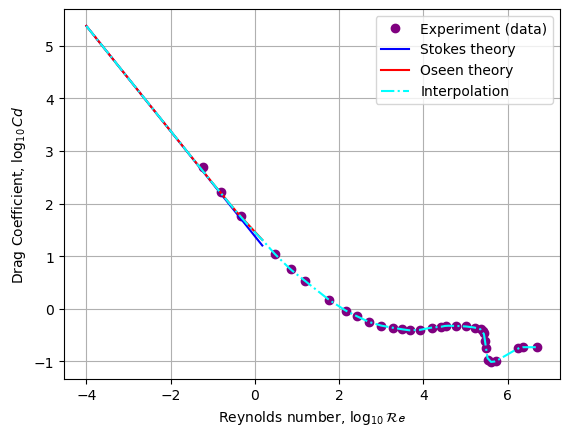

In [3]:
#  Output a graph to show the various estimates
fig, ax = plt.subplots()
ax.plot(Re_logdata,Cd_logdata,'o',color='purple',label='Experiment (data)')
ax.set_xlabel(r'Reynolds number, $\log_{10}\mathcal{Re}$')
ax.set_ylabel(r'Drag Coefficient, $\log_{10}Cd$')
ReL_Stokes = np.linspace(-4.,log(stokes_transition,10),8)
ax.plot(ReL_Stokes,CdL_Stokes(ReL_Stokes),color='blue',label='Stokes theory')
ReL_Oseen = np.linspace(-4.,log(stokes_transition,10),8)#ax.plot(CdL_Oseen,-4,log(stokes_transition,10),color='black',legend_label='Oseen theory')
ax.plot(ReL_Oseen,CdL_Oseen(ReL_Oseen),color='red',label='Oseen theory')
ax.plot(ReL_plot,CdL_plot,'-.',color='cyan',label='Interpolation')
ax.legend()
ax.grid()

In this plot, note that the scales are logarithmic base 10 for both axes.
Note also that there are several types of data used to define the curve:
- cyan line (and purple dots) for experimental observations
- blue and red lines for analytical model calculations.

The dash-dot cyan line interpolates between these data in a sensible way, providing a consistent function across many orders of magnitude of Reynolds number.
The interpolation shown by the cyan line is the form in which $C_d$ would typically be calculated in a biomechanical investigation.

## How to calculate drag forces on organisms

To obtain the drag force on a spherical organism, use the following steps:
1. Use the organism's size ($L$) and velocity ($U$), and the fluid's viscosity ($\mu$) and density ($\rho$) to calculate its Reynolds number,
$$
\mathcal{Re} = \frac{\rho U L}{\mu}
$$
2. Take the logarithm, base 10, of the Reynolds number
3. Find the position on the horizontal axis corresponding to that $\log_{10}\mathcal{Re}$
4. Move vertically to the cyan curve; this is the $\log_{10}C_d$.
5. Calculate the coefficient of drag, $C_d = 10^{\log_{10}C_d}$
6. Calculate the drag force,
   $$
   F_{drag} = \frac{1}{2} \rho L^2 U^2 
   $$

Some tools to make these calculations easier and more precise are provided in [this worksheet](./RS1.ipynb).

## Trends in the $C_d$ curve

Several features of the $C_d$ curve are worth pointing out.
- The denominator in this expression is very similar in form and rationale to our estimate of the [wake momentum](./rscharact2.md).
The rationale is that, in cases where the drag forces are dominated by increases in wake momentum, the numerator will change in a roughly similar way as the denominator.
By the logic in the [scaling of fluid forces](./rscscaling.md), wake momentum is dominant when $\mathcal{Re} \gg 1$.
Therefore, we predict that $C_d$ will change relatively slowly at high Reynolds number.

- In contrast,  at low Reynolds number, we expect the drag from vicous forces to be much higher than from wake momentum. 
Therefore, we predict that $C_d$ will be large and (increase with decreasing Reynolds number) when $\mathcal{Re} \ll 1$.

- In the range $10^4 < \mathcal{Re} < 10^6$, the coefficient of drag has some surprising "wiggles". This is due to the onset of [turbulence](wiki:Turbulence).